In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import regionmask
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [13]:
region = gpd.read_file("../data/boundary/uk-power-networks-boundary.geojson")

region.info()

grid_primary_sites = gpd.read_file("../data/primary-sites/grid-and-primary-sites.geojson")

grid_primary_sites.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   geo_point_2d  1 non-null      object             
 1   name          1 non-null      object             
 2   analytics     1 non-null      float64            
 3   last_updat    1 non-null      datetime64[ms, UTC]
 4   geometry      1 non-null      geometry           
dtypes: datetime64[ms, UTC](1), float64(1), geometry(1), object(2)
memory usage: 172.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sitefunctionallocation  1500 non-null   object        
 1   licencearea             1500 non-null   object        
 2   sitename                1500 non-null   object       

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/3179841994.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


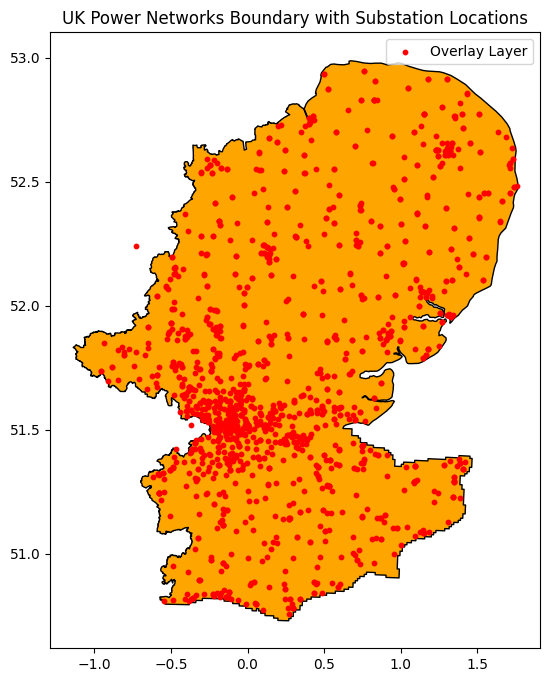

In [14]:

fig, ax = plt.subplots(figsize=(10, 8))

region.plot(ax=ax, edgecolor='black', facecolor='orange', linewidth=1, label="UK Power Networks Boundary")

grid_primary_sites.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="Overlay Layer", markersize=10)

plt.title("UK Power Networks Boundary with Substation Locations")
plt.legend()
plt.show()

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/1761452135.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/1761452135.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


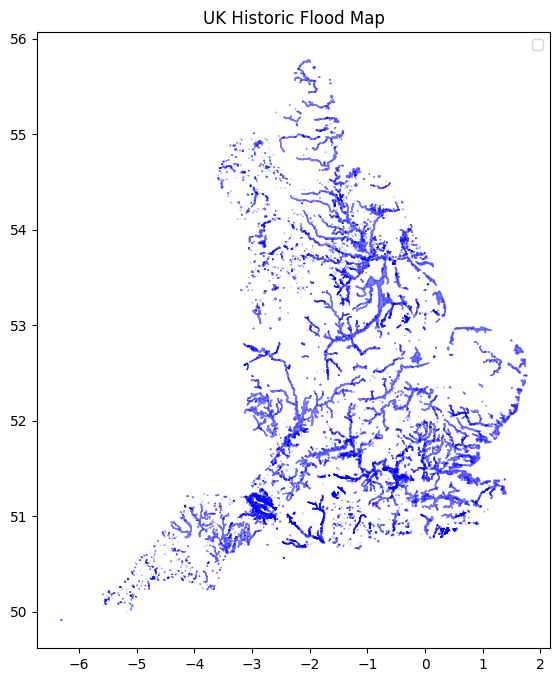

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/1761452135.py:13: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  flood_segment = gpd.overlay(flood_history, region, how='intersection')
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/1761452135.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


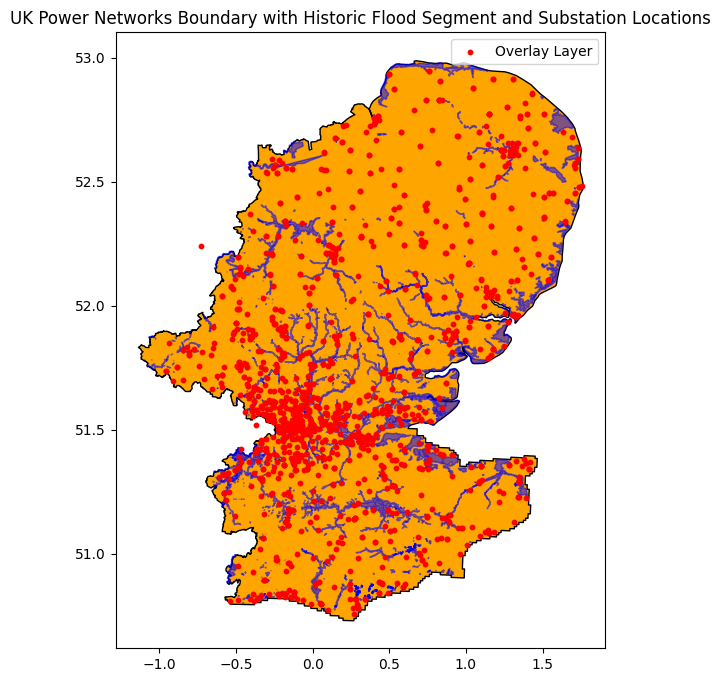

In [15]:
flood_history = gpd.read_file("../data/flood-history/Historic_Flood_Map.geojson")

fig, ax = plt.subplots(figsize=(10, 8))

flood_history.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History", alpha=0.5)

plt.title("UK Historic Flood Map")
plt.legend()
plt.show()

flood_history = flood_history.to_crs(region.crs)

flood_segment = gpd.overlay(flood_history, region, how='intersection')

fig, ax = plt.subplots(figsize=(10, 8))
region.plot(ax=ax, edgecolor='black', facecolor='orange', linewidth=1, label="UK Power Networks Boundary")
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)
grid_primary_sites.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="Overlay Layer", markersize=10)

plt.title("UK Power Networks Boundary with Historic Flood Segment and Substation Locations")
plt.legend()
plt.show()

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/819003778.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/819003778.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


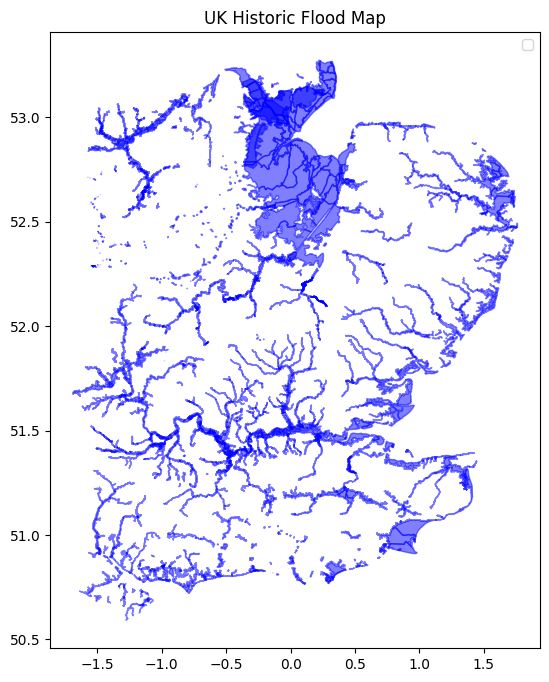

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/819003778.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


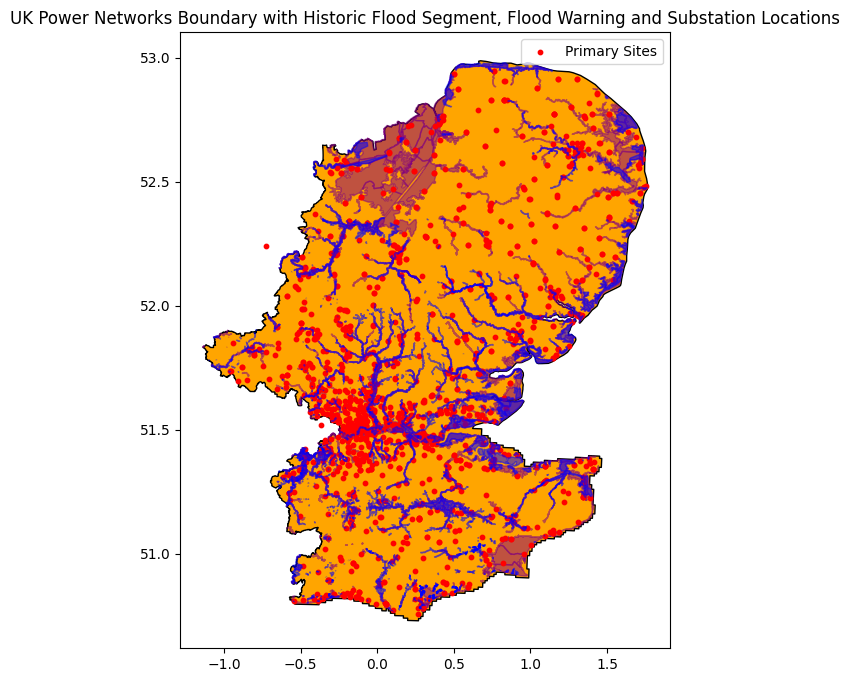

In [16]:
flood_warning = gpd.read_file("../data/flood-warning-areas/ukpn-flood-warning-areas.geojson")

fig, ax = plt.subplots(figsize=(10, 8))

flood_warning.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History", alpha=0.5)

plt.title("UK Historic Flood Map")
plt.legend()
plt.show()

flood_warning = flood_warning.to_crs(region.crs)

flood_warning_segment = gpd.overlay(flood_warning, region, how='intersection')

fig, ax = plt.subplots(figsize=(10, 8))
region.plot(ax=ax, edgecolor='black', facecolor='orange', linewidth=1, label="UK Power Networks Boundary")
flood_warning_segment.plot(ax=ax, edgecolor='purple', facecolor='purple', linewidth=1, linestyle='-', label="Flood Warning", alpha=0.5)
grid_primary_sites.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="Primary Sites", markersize=10)
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)

plt.title("UK Power Networks Boundary with Historic Flood Segment, Flood Warning and Substation Locations")
plt.legend()
plt.show()

In [17]:
enwl_boundary = gpd.read_file("../data/boundary/enwl_dfes_local_authority_polygons.geojson")


In [18]:
enwl_primary_sites = gpd.read_file("../data/primary-sites/dfes-2024-primary-sites.geojson")

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/4060511720.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


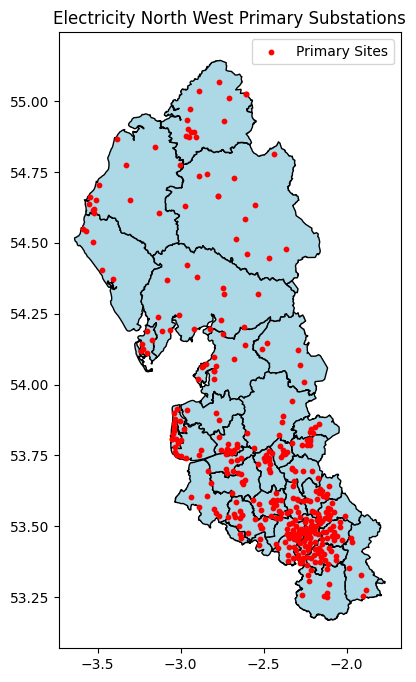

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

enwl_boundary.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth=1, label="Electricity North West Boundary")

enwl_primary_sites.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="Primary Sites", markersize=10)

plt.title("Electricity North West Primary Substations")
plt.legend()
plt.show()

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_40782/3373794227.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


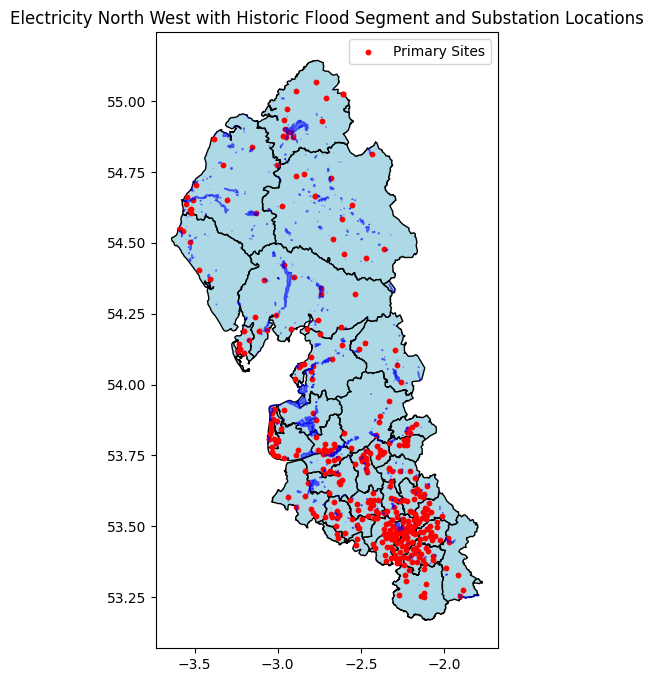

In [ ]:
flood_segment = gpd.overlay(flood_history, enwl_boundary, how='intersection')

fig, ax = plt.subplots(figsize=(10, 8))
enwl_boundary.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth=1, label="Electricity North West Boundary")
enwl_primary_sites.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="Primary Sites", markersize=10)
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)

plt.title("Electricity North West with Historic Flood Segment and Substation Locations")
plt.legend()
plt.show()